In [38]:
from skimage import io, transform
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from torch.utils import data
import torch
from torch import nn
from torch import optim
import torchvision
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import torch.utils.data as data_utils
from PIL import Image, ImageFile
import json
from torch.optim import lr_scheduler
import time
import os
import argparse
import copy
import pandas as pd
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2



In [39]:
# Import useful sklearn functions
import sklearn
from sklearn.metrics import cohen_kappa_score, accuracy_score
import time
from tqdm import tqdm_notebook

import os
base_dir ="C:\\Users\\thesh\\Downloads\\sampleimages (1)\\sampleimages"

In [40]:
class CreateDataset(Dataset):
    def __init__(self, df_data, data_dir , transform=None):
        super().__init__()
        self.df = df_data.values
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img_name,label = self.df[index]
        img_path = os.path.join(self.data_dir, img_name+'.png')
        image = Image.open(img_path)
        image.load()# if getting error, use PIL to load the image here.
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [41]:
test_csv = pd.read_csv(r"C:\Users\thesh\Downloads\test (1).csv")


In [42]:
test_path = r"C:\Users\thesh\Downloads\sampleimages (1)\sampleimages"


In [43]:
test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    #torchvision.transforms.ColorJitter(brightness=2, contrast=2),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [44]:
test_csv['diagnosis'] = -1


In [45]:
test_data = CreateDataset(df_data=test_csv, data_dir=test_path, transform=test_transforms)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [46]:
def round_off_preds(preds, coef=[0.5, 1.5, 2.5, 3.5]):
    for i, pred in enumerate(preds):
            if pred < coef[0]:
                preds[i] = 0
            elif pred >= coef[0] and pred < coef[1]:
                preds[i] = 1
            elif pred >= coef[1] and pred < coef[2]:
                preds[i] = 2
            elif pred >= coef[2] and pred < coef[3]:
                preds[i] = 3
            else:
                preds[i] = 4
    return preds

In [47]:
def predict(testloader):
    '''Function used to make predictions on the test set'''
    model.eval()
    preds = []
    for batch_i, (data, target) in enumerate(testloader):
        data, target = data.cuda(), target.cuda()
        output = model(data)
        pr = output.detach().cpu().numpy()
        for i in pr:
            preds.append(i.item())
            
    return preds

In [48]:
def load_model(path):
  checkpoint = torch.load(path,map_location=torch.device('cpu'))
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  return model

In [49]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet152(pretrained=False) 

num_ftrs = model.fc.in_features 
out_ftrs = 5 
  
model.fc = nn.Sequential(nn.Linear(num_ftrs, 512),nn.ReLU(),nn.Linear(512,out_ftrs),nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.00001) 

scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
model.to(device);

c:\Users\thesh\miniconda3\envs\ml_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thesh\miniconda3\envs\ml_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [50]:
# to unfreeze more layers 
for name,child in model.named_children():
  if name in ['layer2','layer3','layer4','fc']:
    for param in child.parameters():
      param.requires_grad = True
  else:
    for param in child.parameters():
      param.requires_grad = False

In [51]:
optimizer = torch.optim.Adam(filter(lambda p:p.requires_grad,model.parameters()) , lr = 0.000001) 
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [52]:
model=load_model(r"C:\Users\thesh\Downloads\classifier (1).pt")

In [53]:
test_dir = r"C:\Users\thesh\Downloads\sampleimages (1)\sampleimages"

In [54]:
# with torch.no_grad():
#     model.eval()
#     p_labels = []
#     img_ids = []
#     i = 0
#     for inputs, labels in test_loader:
#         i += 1
#         if i % 10 == 0:
#             print(f'{i} pass step')
#         inputs = inputs.to(device)
#         labels = labels.to(device)
#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
#         p_labels.append(preds)
#     # getting ids of file images    

In [55]:
def __getitem__(self, index):
    img_name, label = self.df[index]
    img_path = os.path.join(self.data_dir, img_name+'.png')
    print(img_path)  # print the image file path
    image = Image.open(img_path)
    image.load()  # if getting error, use PIL to load the image here.
    if self.transform is not None:
        image = self.transform(image)
    return image, label

In [56]:
#additinal
class CreateDataset(Dataset):
    def __init__(self, df_data, data_dir, transform=None):
        super().__init__()
        self.df = df_data.values
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        img_name,label = self.df[index]
        img_path = os.path.join(self.data_dir, img_name+'.png')
        if not os.path.isfile(img_path):
            raise FileNotFoundError(f"File '{img_path}' not found")
        image = Image.open(img_path)
        image.load()# if getting error, use PIL to load the image here.
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [57]:
# pred_labels = []
# for l in p_labels:
#     for l1 in l:
#         pred_labels.append(l1.item())

In [58]:
def test_with_single_image(model, file, transform, classes):

    file = Image.open(file).convert('RGB')

    img = transform(file).unsqueeze(0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    with torch.no_grad():
        out = model(img.to(device))
        ps = torch.exp(out)
        top_p, top_class = ps.topk(1, dim=1)
        value = top_class.item()
        print("Value:", value)
        print(classes[value])
        plt.imshow(np.array(file))
        plt.show()

['eye1.png', 'eye10.jpg', 'eye11.png', 'eye12.jpg', 'eye13.jpg', 'eye14.jpg', 'eye15.jpg', 'eye16.png', 'eye17.png', 'eye18.png', 'eye19.png', 'eye2.png', 'eye20.png', 'eye3.png', 'eye4.jpg', 'eye5.jpg', 'eye6.jpg', 'eye7.jpg', 'eye8.jpg', 'eye9.jpg']
Value: 2
Moderate


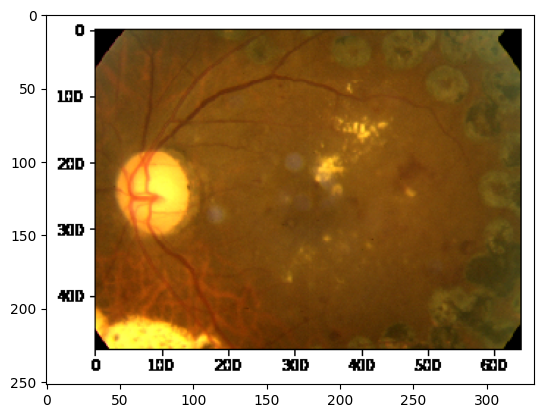

Value: 2
Moderate


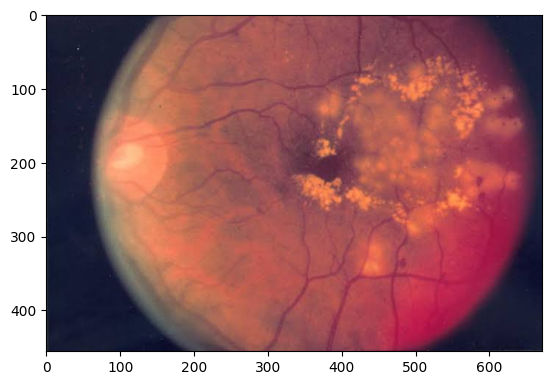

Value: 2
Moderate


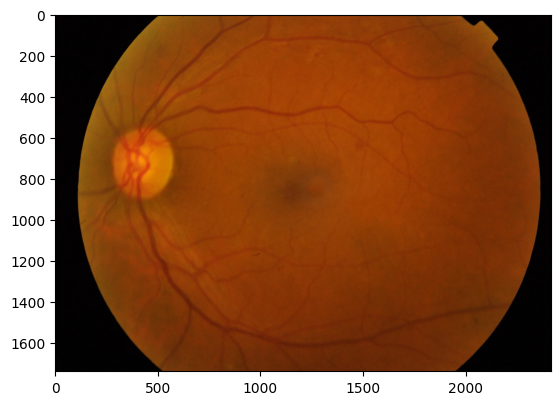

Value: 2
Moderate


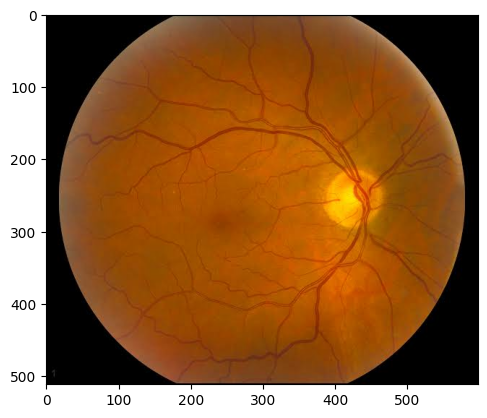

Value: 2
Moderate


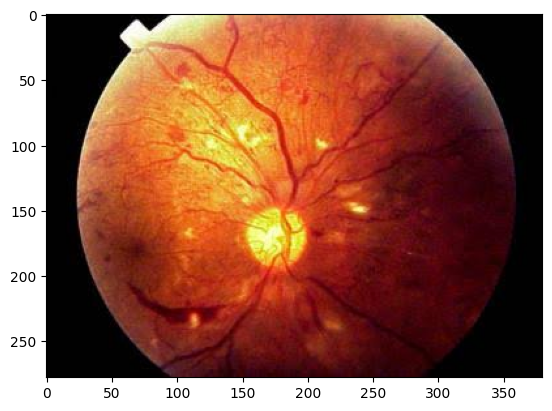

Value: 2
Moderate


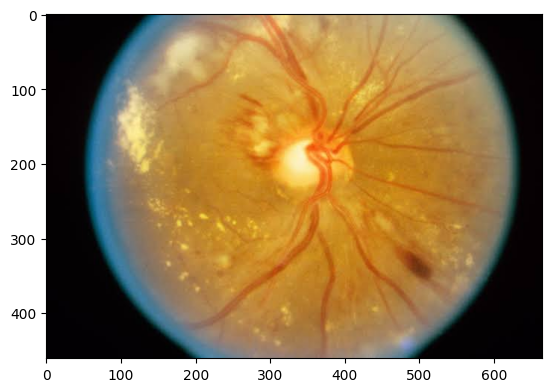

Value: 2
Moderate


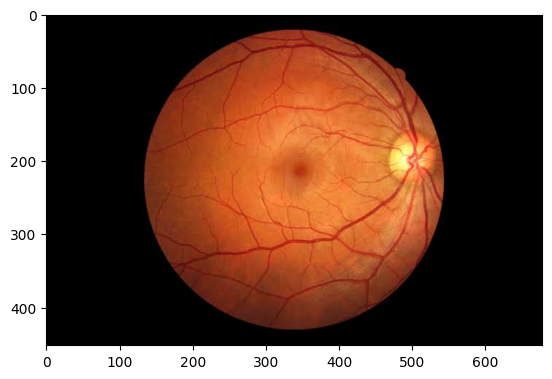

Value: 2
Moderate


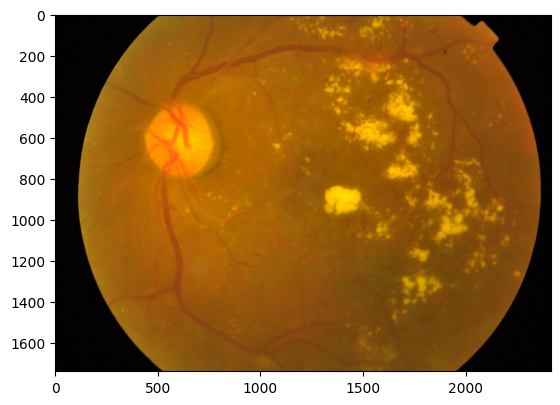

Value: 2
Moderate


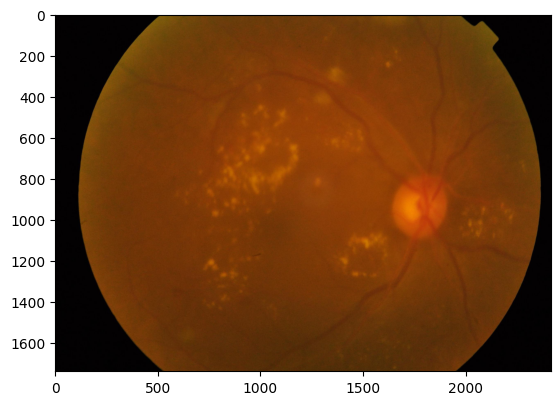

Value: 2
Moderate


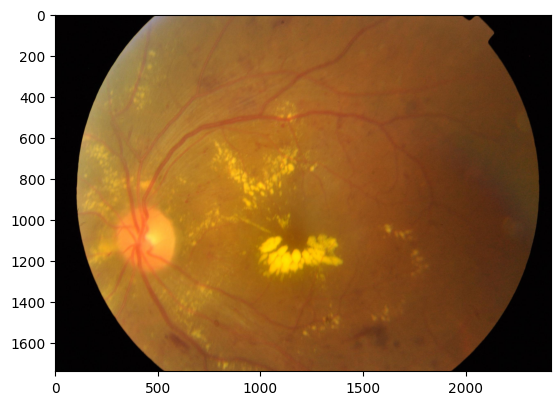

Value: 2
Moderate


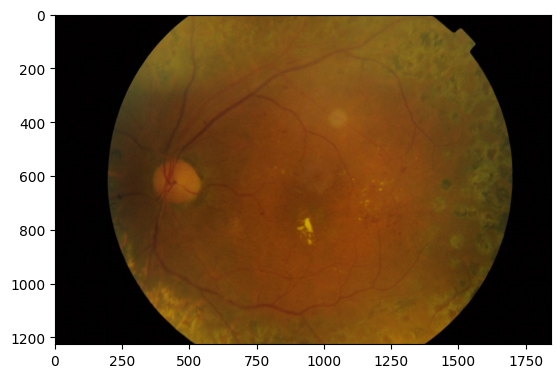

Value: 2
Moderate


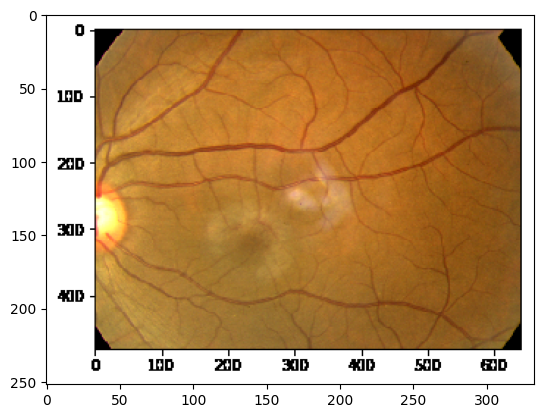

Value: 2
Moderate


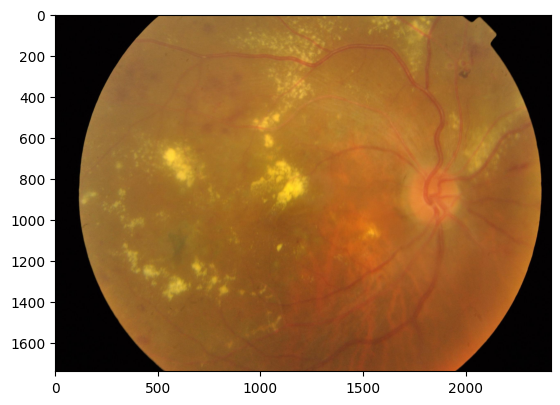

Value: 2
Moderate


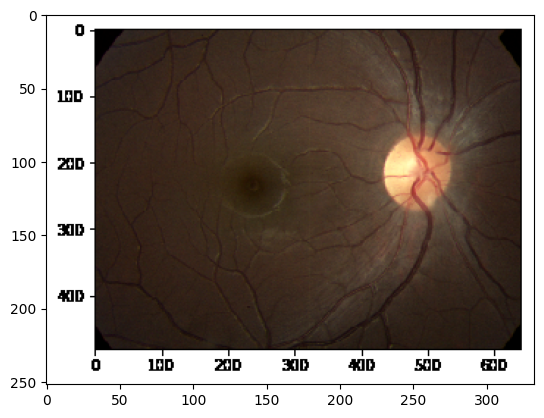

Value: 2
Moderate


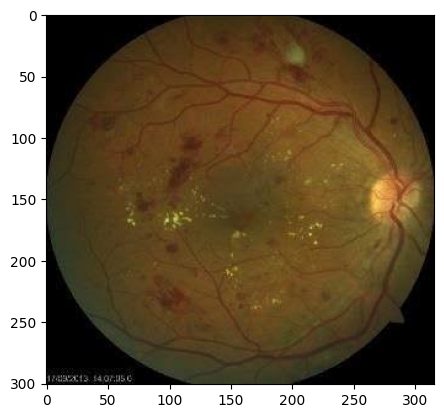

Value: 2
Moderate


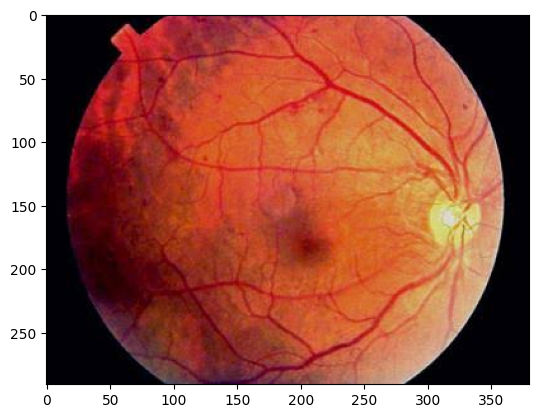

Value: 2
Moderate


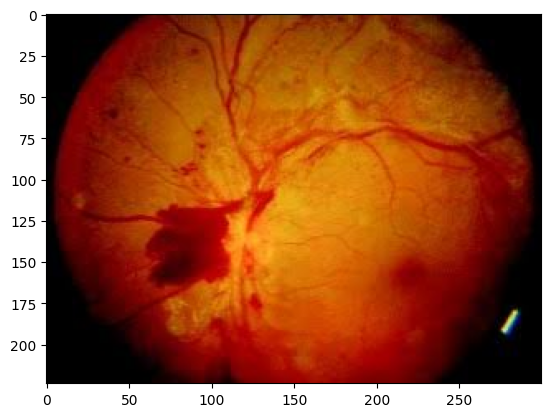

Value: 2
Moderate


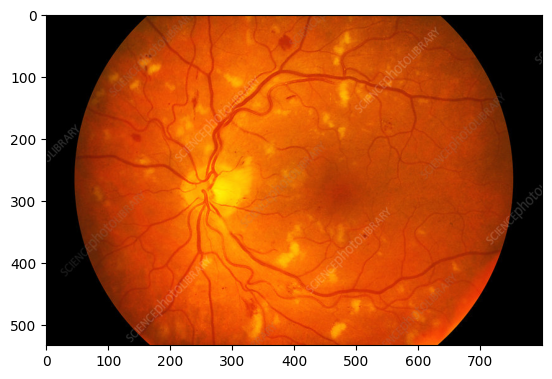

Value: 2
Moderate


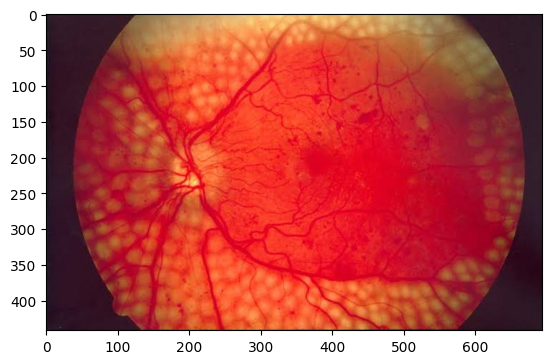

Path:  C:\Users\thesh\Downloads\sampleimages (1)\sampleimages\eye8.jpg


In [59]:
import random

test_dir = "C:\\Users\\thesh\\Downloads\\sampleimages (1)\\sampleimages"
# take random folder first
# save label

# now take random file
files = os.listdir(test_dir)
print(files)
nums = random.randint(0, len(files)-1)
for i in range(0,len(files)-1):
    name = test_dir + "\\" + files[i]
    classes = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
    test_with_single_image(model, name, test_transforms, classes)

print('Path: ', name)

Value: 2
Moderate


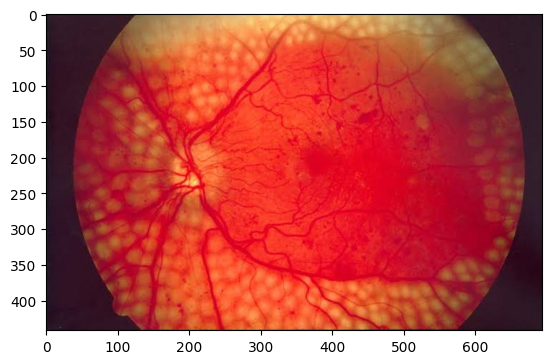

In [60]:
classes = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
test_with_single_image(model, name, test_transforms, classes)


In [61]:
# model.py
import numpy as np
import matplotlib.pyplot as plt

def main(image_path):
    # Your code here to process the image and return the predicted label and class
    value = "some_value"
    classes = "some_classes"
    return value, classes

In [62]:
# model.py
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

def main(image_path):
    # Load the image
    image = plt.imread(image_path)

    # Preprocess the image
    image = np.expand_dims(image, axis=0)
    image = image / 255.

    # Pass the image through the model
    predictions = model.predict(image)

    # Get the predicted label and class
    predicted_label = np.argmax(predictions)
    predicted_class = model.class_names[predicted_label]

    return predicted_label, predicted_class

In [65]:
import torch

class Model:
    def __init__(self, model_path):
        self.model = torch.load(model_path)
        self.model.eval()

    def main(self, image_path):
        # Load the image and convert it to a tensor
        image = Image.open(image_path).convert('RGB')
        tensor = transforms.ToTensor()(image)

        # Add batch dimension
        tensor = tensor.unsqueeze(0)

        # Add any necessary preprocessing here, if any

        # Make the prediction
        with torch.no_grad():
            output = self.model(tensor)

        # Get the predicted label
        _, predicted = torch.max(output.data, 1)

        # Get the corresponding class name
        classes = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
        predicted_class = classes[predicted.item()]

        return predicted.item(), predicted_class

In [64]:
import torch

class Model:
    def __init__(self, model_path):
        self.model = torch.load(model_path)
        self.model.eval()

    def main(self, image_path):
        # Load the image and convert it to a tensor
        image = Image.open(image_path).convert('RGB')
        tensor = transforms.ToTensor()(image)

        # Add batch dimension
        tensor = tensor.unsqueeze(0)

        # Add any necessary preprocessing here, if any

        # Make the prediction
        with torch.no_grad():
            output = self.model(tensor)

        # Get the predicted label
        _, predicted = torch.max(output.data, 1)

        # Get the corresponding class name
        classes = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
        predicted_class = classes[predicted.item()]

        return predicted.item(), predicted_class

GUI SYSTEM STARTED...
C:/Users/thesh/Downloads/sampleimages (1)/sampleimages/eye4.jpg


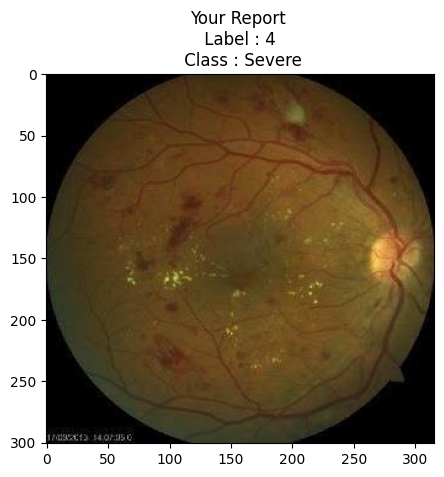

Thanks for using the system!


In [4]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import messagebox
from PIL import Image,ImageTk
import os
from tkinter.filedialog import askopenfilename, asksaveasfilename
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
import random

print('GUI SYSTEM STARTED...')

class Model:
    def __init__(self):
        pass

    def main(self, image_path):
        value = random.randint(1, 5)
        classes = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
        predicted_class = classes[value-1]
        return value, predicted_class

def OpenFile():
    try:
        a = askopenfilename()
        if a:  # check if a file was actually selected
            print(a)
            model_instance = Model()
            value, classes = model_instance.main(a)  # Call the main function from the model module
            messagebox.showinfo("your report", ("Predicted Label: ", value, "\n Predicted Class: ", classes))
            image = Image.open(a)
            file = image.convert('RGB')
            plt.imshow(np.array(file))
            plt.title(f'Your Report \n Label : {value} \n Class : {classes}')
            plt.show()
            print('Thanks for using the system!')
        else:
            print("No file selected. Exiting...")
    except Exception as error:
        print("Error:", error)

y = True
root = Tk()
root.geometry('700x400')
root.title("DIABETIC RETINOPATHY CLASSIFICATION")
root.configure(bg='#c488fc')
label1 = tk.Label(root, text="DIABETIC RETINOPATHY",bg='white', font=('Arial', 30), justify="center")
label1.grid(padx=100, pady=30, row=0,sticky='W')
label2 = Label(root, text="Choose an image", font=('Arial', 15))
label2.grid(padx=230, pady=10, row=2, sticky='W')
button2 = tk.Button(root, text="Upload Image",bg='#cbc9be', command=OpenFile)
button2.grid(padx=400, pady=10, row=2)

root.mainloop()